In [1]:
import csv
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
import math
from random import choices, randrange

In [2]:
df = pd.read_csv("data.csv",header=0)
df = df.drop(df.columns[0],1)

In [3]:
np_data = df.values
np_data = np.transpose(np_data)

In [4]:
num = 5

In [5]:
model = NMF(n_components=num, init="random", solver="cd", verbose=False)

In [6]:
W = model.fit_transform(np_data)
H = model.components_

In [7]:
predicted_labels = []
for x in range(H[0].size):
    current_sample = list(H[:,x])
    predicted_labels.append(current_sample.index(max(current_sample)))

In [8]:
numeric_labels = {"PRAD":0, "LUAD":1, "BRCA":2, "KIRC":3, "COAD":4}
ground_truth = []

with open("labels.csv","r") as f:
    datafile = csv.reader(f)
    first = True
    for row in datafile:
        if first: first = not first; continue
        label = str(row[1])
        ground_truth.append(numeric_labels[label])

In [9]:
adjusted_mutual_info_score(ground_truth,predicted_labels,"arithmetic")

0.8719863662077558

In [10]:
angle_range = [0]
for i in range(num):
    count = predicted_labels.count(i)
    angle_range.append(int(count / len(predicted_labels) * 360 + angle_range[-1]))

In [11]:
colors = {0:"orange", 1:"green", 2:"blue", 3:"magenta", 4:"red"}  # colors assigned based on ground truth

In [12]:
def weighted_random():
    rands = range(0, 1000)
    weights = range(0, 1000)
    
    return choices(rands, weights=weights)[0] / 1000

In [13]:
#assigning point coordinates and color
coords = {}
for i in range(len(predicted_labels)):
    a = randrange(angle_range[predicted_labels[i]],angle_range[predicted_labels[i] + 1]) * math.pi / 180
    r = weighted_random()
    
    coords[r * math.cos(a), r * math.sin(a)] = colors[ground_truth[i]]

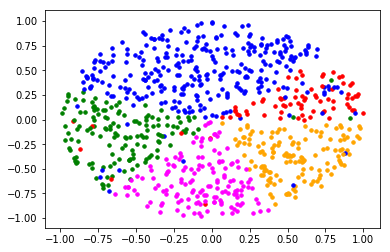

In [14]:
keys = tuple(coords.keys())

for index in range(len(keys)):
    plt.scatter(keys[index][0], keys[index][1], color=coords[keys[index]], s=12)

In [26]:
for i in range(len(predicted_labels)):
    print(predicted_labels[i], ground_truth[i])

3 0
4 1
3 0
3 0
2 2
3 0
1 3
3 0
2 2
3 0
2 2
1 3
3 0
2 2
2 2
2 2
4 1
1 3
1 3
3 0
2 2
1 3
4 1
2 2
1 3
4 1
0 4
2 2
2 2
2 2
2 2
2 2
1 3
2 2
3 0
2 2
1 3
4 1
2 2
2 2
1 3
3 0
3 0
1 3
1 3
2 2
3 0
0 4
2 2
4 1
2 2
4 1
0 2
3 0
0 4
0 2
2 2
0 4
1 3
2 2
4 1
1 3
2 2
4 1
3 0
0 4
2 2
3 0
1 3
2 2
1 3
2 2
2 2
4 1
2 2
4 1
2 2
1 3
3 0
0 4
2 2
3 0
2 2
2 2
3 0
3 0
2 2
2 2
1 3
2 2
3 0
3 0
2 2
2 2
2 2
3 0
0 4
2 2
3 0
2 2
2 2
1 3
2 2
1 3
4 1
1 3
4 1
0 4
4 1
4 1
3 0
2 2
4 1
3 0
2 2
1 3
1 3
1 3
2 2
2 2
4 1
1 3
4 1
2 2
3 0
3 0
3 0
2 2
1 3
0 1
0 4
0 2
0 4
2 2
2 2
1 3
4 1
2 2
1 3
0 4
2 2
3 0
2 2
1 3
4 1
0 4
3 0
2 2
4 1
4 1
4 1
4 1
2 2
2 2
4 1
2 2
2 2
3 0
3 0
4 1
3 0
4 1
1 3
2 2
3 0
4 1
0 4
1 3
4 1
2 2
1 3
4 1
2 2
4 1
2 2
2 2
2 2
3 0
2 2
1 3
0 4
1 3
2 2
3 0
3 0
3 0
4 1
4 1
2 2
4 1
4 1
1 3
4 1
3 0
4 1
2 2
2 2
2 2
4 1
4 1
2 2
1 3
1 3
1 3
1 3
3 0
0 2
3 0
2 2
4 1
4 1
2 2
3 0
2 2
3 0
2 2
2 2
2 2
4 1
2 2
1 3
4 1
1 3
1 3
4 1
2 2
1 3
3 0
2 2
4 1
4 1
3 0
0 4
2 2
1 3
3 0
1 3
0 4
2 2
1 3
1 3
4 1
3 0
3 0
4 1
4 1
1 3
2 2
2 2
0 4


In [27]:
correspondence = {3:0, 4:1, 1:3, 2:2, 0:4}

In [28]:
for i in range(len(predicted_labels)):
    predicted_labels[i] = correspondence[predicted_labels[i]]

In [29]:
for i in range(len(predicted_labels)):
    print(predicted_labels[i], ground_truth[i])

0 0
1 1
0 0
0 0
2 2
0 0
3 3
0 0
2 2
0 0
2 2
3 3
0 0
2 2
2 2
2 2
1 1
3 3
3 3
0 0
2 2
3 3
1 1
2 2
3 3
1 1
4 4
2 2
2 2
2 2
2 2
2 2
3 3
2 2
0 0
2 2
3 3
1 1
2 2
2 2
3 3
0 0
0 0
3 3
3 3
2 2
0 0
4 4
2 2
1 1
2 2
1 1
4 2
0 0
4 4
4 2
2 2
4 4
3 3
2 2
1 1
3 3
2 2
1 1
0 0
4 4
2 2
0 0
3 3
2 2
3 3
2 2
2 2
1 1
2 2
1 1
2 2
3 3
0 0
4 4
2 2
0 0
2 2
2 2
0 0
0 0
2 2
2 2
3 3
2 2
0 0
0 0
2 2
2 2
2 2
0 0
4 4
2 2
0 0
2 2
2 2
3 3
2 2
3 3
1 1
3 3
1 1
4 4
1 1
1 1
0 0
2 2
1 1
0 0
2 2
3 3
3 3
3 3
2 2
2 2
1 1
3 3
1 1
2 2
0 0
0 0
0 0
2 2
3 3
4 1
4 4
4 2
4 4
2 2
2 2
3 3
1 1
2 2
3 3
4 4
2 2
0 0
2 2
3 3
1 1
4 4
0 0
2 2
1 1
1 1
1 1
1 1
2 2
2 2
1 1
2 2
2 2
0 0
0 0
1 1
0 0
1 1
3 3
2 2
0 0
1 1
4 4
3 3
1 1
2 2
3 3
1 1
2 2
1 1
2 2
2 2
2 2
0 0
2 2
3 3
4 4
3 3
2 2
0 0
0 0
0 0
1 1
1 1
2 2
1 1
1 1
3 3
1 1
0 0
1 1
2 2
2 2
2 2
1 1
1 1
2 2
3 3
3 3
3 3
3 3
0 0
4 2
0 0
2 2
1 1
1 1
2 2
0 0
2 2
0 0
2 2
2 2
2 2
1 1
2 2
3 3
1 1
3 3
3 3
1 1
2 2
3 3
0 0
2 2
1 1
1 1
0 0
4 4
2 2
3 3
0 0
3 3
4 4
2 2
3 3
3 3
1 1
0 0
0 0
1 1
1 1
3 3
2 2
2 2
4 4


In [30]:
zero = {i:0 for i in range(5)}
one = {i:0 for i in range(5)}
two = {i:0 for i in range(5)}
three = {i:0 for i in range(5)}
four = {i:0 for i in range(5)}

for i in range(len(predicted_labels)):
    if ground_truth[i] == 0:
        zero[predicted_labels[i]] += 1
    elif ground_truth[i] == 1:
        one[predicted_labels[i]] += 1
    elif ground_truth[i] == 2:
        two[predicted_labels[i]] += 1
    elif ground_truth[i] == 3:
        three[predicted_labels[i]] += 1
    else:
        four[predicted_labels[i]] += 1

In [24]:
print(zero)
print(one)
print(two)
print(three)
print(four)

{0: 0, 1: 0, 2: 0, 3: 136, 4: 0}
{0: 3, 1: 0, 2: 0, 3: 0, 4: 138}
{0: 20, 1: 1, 2: 269, 3: 2, 4: 8}
{0: 0, 1: 146, 2: 0, 3: 0, 4: 0}
{0: 71, 1: 2, 2: 0, 3: 0, 4: 5}
